In [170]:
import tensorflow as tf
import numpy as np

import tensorflow_datasets as tfds

In [171]:
tf.__version__

'2.6.0'

In [172]:
DATASET_PATH = 'D:\\Kinship Verification\\tensorflow_codes\\data\\KinFaceW\\KinFaceW-I'

In [173]:
anchor_img = tf.keras.utils.load_img(DATASET_PATH+'\\father-dau\\fd_001_1.jpg')
pos_img = tf.keras.utils.load_img(DATASET_PATH+'\\father-dau\\fd_001_2.jpg')
# img = tf.keras.utils.load_img('sample.jpeg')

In [174]:
# img = np.array(img)

In [175]:
anchor = tf.train.Feature(
    bytes_list=tf.train.BytesList(value=[anchor_img.tobytes()])
)

pos = tf.train.Feature(
    bytes_list=tf.train.BytesList(value=[pos_img.tobytes()])
)

In [176]:
ex = tf.train.Example(
    features=tf.train.Features(feature={
        'anchor': anchor,
        'pos': pos
    }
))

In [177]:
record_file = 'images.tfrecords'
with tf.io.TFRecordWriter(record_file) as writer:
    writer.write(ex.SerializeToString())

In [196]:
raw_image_dataset = tf.data.TFRecordDataset('images.tfrecords')

def _parse_image_function(example_proto):
#     print(example_proto)
    tensor = tf.io.parse_single_example(example_proto, {
        'anchor': tf.io.FixedLenFeature([], tf.string),
        'pos': tf.io.FixedLenFeature([], tf.string)
    })
#     print(tensor['anchor'].numpy())
    return tensor

raw_image_dataset.map(_parse_image_function)

<MapDataset shapes: {anchor: (), pos: ()}, types: {anchor: tf.string, pos: tf.string}>

In [197]:
features = tfds.features.FeaturesDict({
    'anchor':
        tfds.features.Image(
            shape=(256, 256, 3),
            doc='Picture taken by smartphone, downscaled.'),
    'pos':
        tfds.features.Image(
            shape=(256, 256, 3),
            doc='Picture taken by smartphone, downscaled.'),
})

In [198]:
import IPython.display as display
from PIL import Image

In [199]:
for item in raw_image_dataset:
    t = tf.io.parse_single_example(item, {
        'anchor': tf.io.FixedLenFeature([], tf.string),
        'pos': tf.io.FixedLenFeature([], tf.string)
    })
#     print(t['pos_image'].numpy())
    im = Image.frombytes('RGB', (64,64), t['pos'].numpy(), 'raw')

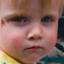

In [200]:
im